In [4]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 8.9 MB/s eta 0:00:12
   ---------------------------------------- 1.1/99.8 MB 14.4 MB/s eta 0:00:07
    --------------------------------------- 2.0/99.8 MB 15.7 MB/s eta 0:00:07
   - -------------------------------------- 2.8/99.8 MB 16.3 MB/s eta 0:00:06
   - -------------------------------------- 3.6/99.8 MB 16.2 MB/s eta 0:00:06
   - -------------------------------------- 4.5/99.8 MB 16.9 MB/s eta 0:00:06
   -- ------------------------------------- 5.2/99.8 MB 16.8 MB/s eta 0:00:06
   -- ------------------------------------- 6.2/99.8 MB 17.1 MB/s eta 0:00:06
   -- ------------------------------------- 7.0/99.8 MB 17.2 MB/s eta 0:00:06
   --- ------------------------------------ 8.0/99.8 MB 17.6 MB/s eta 0:00:06
   --- ------------------------------------ 8.9/99.8 MB 17.8 MB/s eta 0:00:06
   --- ------------------------------------ 9.9/99.8 MB 18.1 MB/s eta 0:0

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [8]:
train = pd.read_csv(r"C:\Users\varun\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\varun\Downloads\test.csv")


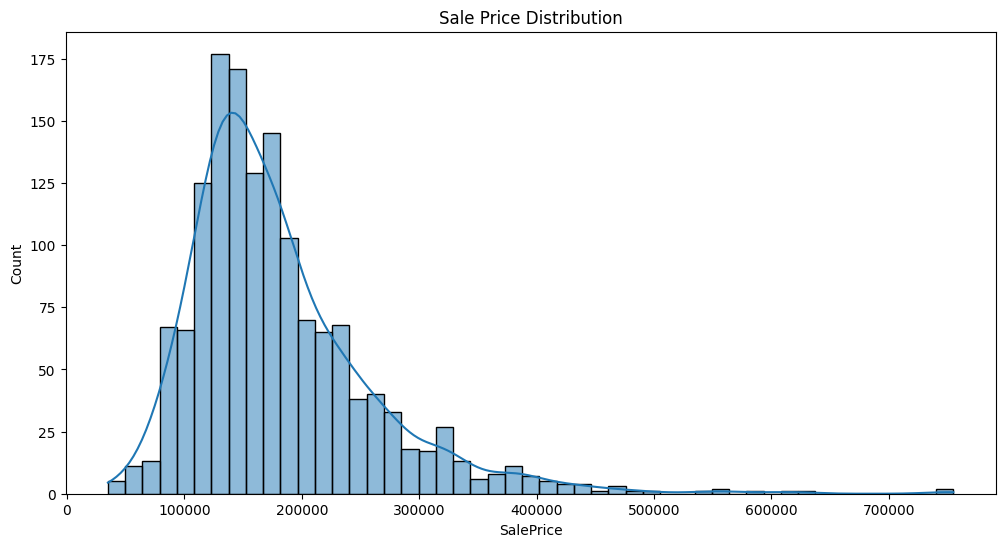

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()

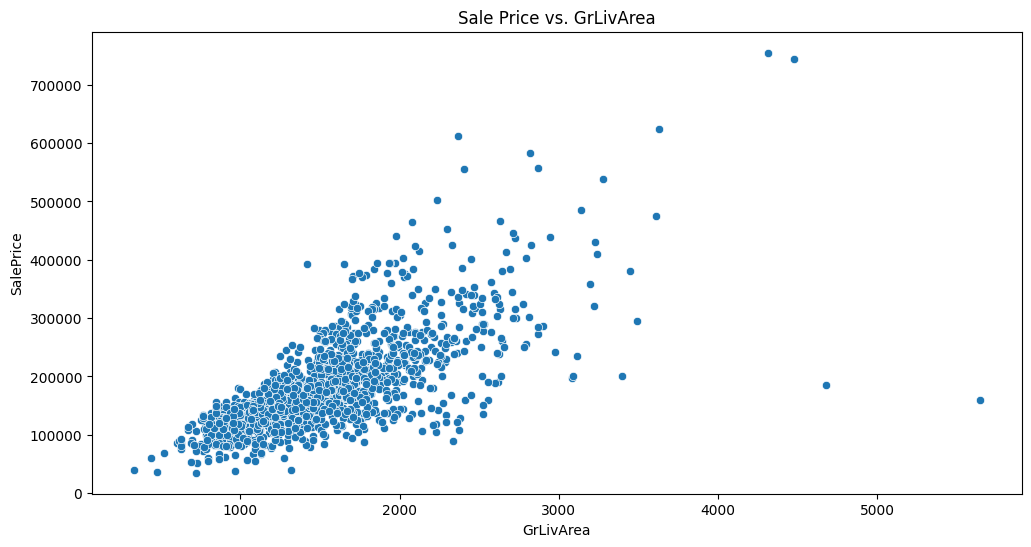

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Sale Price vs. GrLivArea')
plt.show()

In [12]:
numeric_train = train.select_dtypes(include=['number'])
correlation_matrix = numeric_train.corr()


In [13]:
train_encoded = pd.get_dummies(train)
correlation_matrix = train_encoded.corr()


In [14]:
numeric_train = train.select_dtypes(include=['number'])
correlation_matrix = numeric_train.corr()


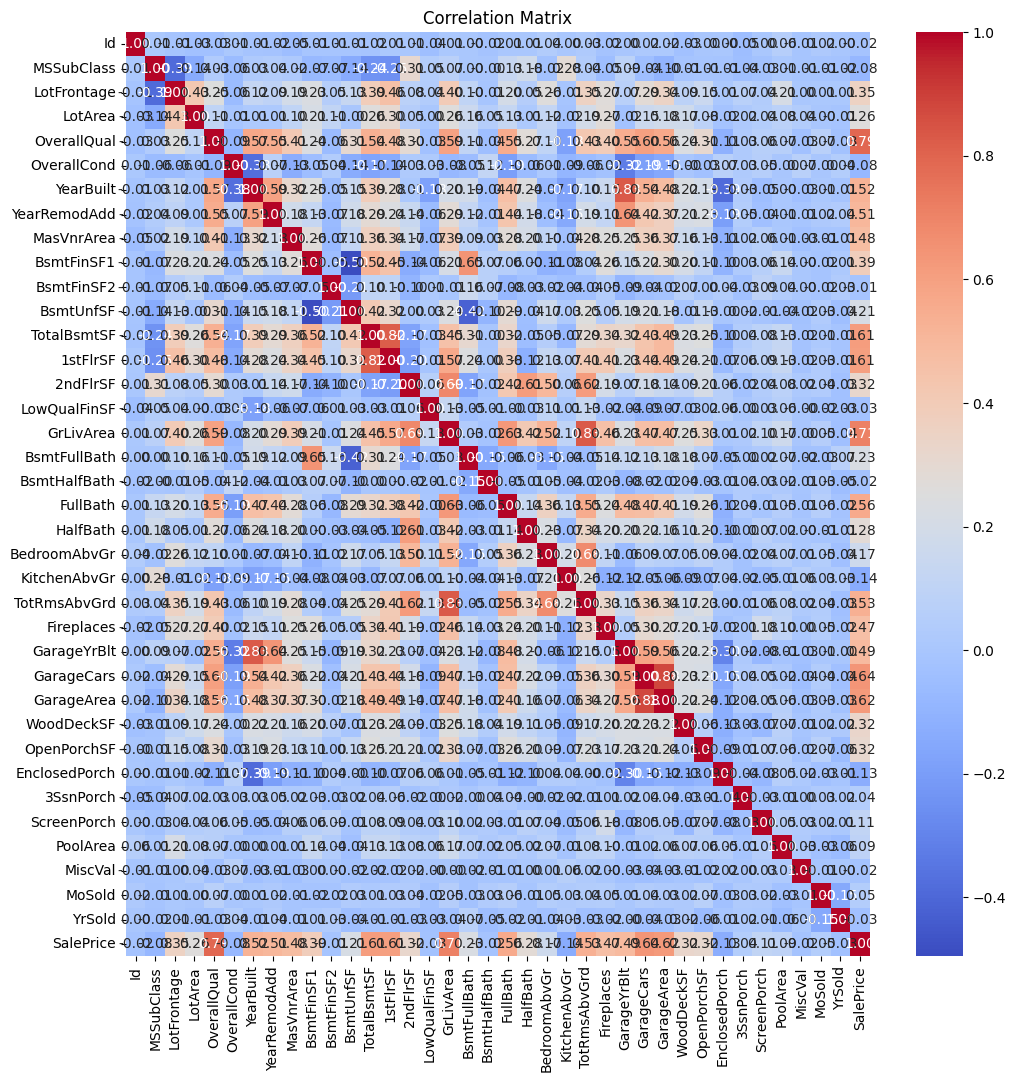

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [16]:
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).drop(['Id', 'SalePrice'], axis=1).columns
     

In [17]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns)])
     

In [18]:
# Prepare the data
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
X_test = test.drop(['Id'], axis=1)
     

In [19]:
# Prepare the data
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
X_test = test.drop(['Id'], axis=1)
     

In [20]:
# Define base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(n_jobs=-1, random_state=42)),
    ('xgb_regressor', XGBRegressor(n_jobs=-1, random_state=42)),
    ('lasso', Lasso(max_iter=10000, random_state=42))
]

In [22]:
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1)
     

In [38]:
# Print data types of all columns
print(train.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [54]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
data = pd.read_csv(r"C:\Users\varun\Downloads\train.csv")

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Display data types of columns
print("\nData types of columns:")
print(data.dtypes)

# Display basic statistics of columns
print("\nBasic statistics of columns:")
print(data.describe())


First few rows of the DataFrame:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  

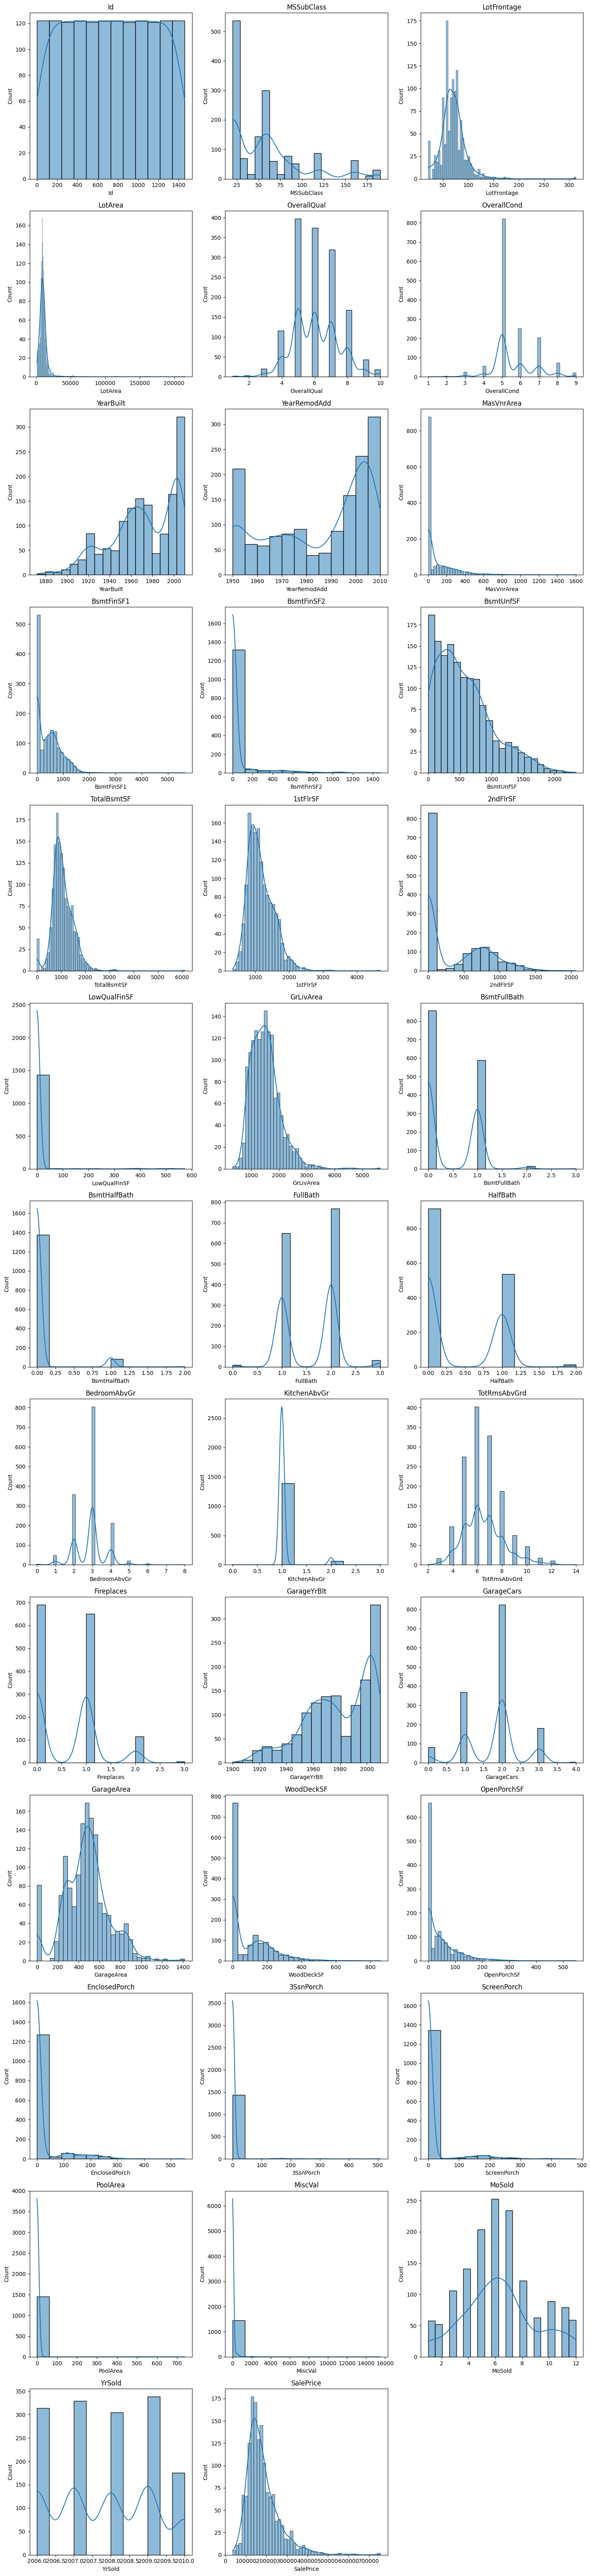

C:\Users\varun\AppData\Local\Temp\ipykernel_10996\3887406076.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


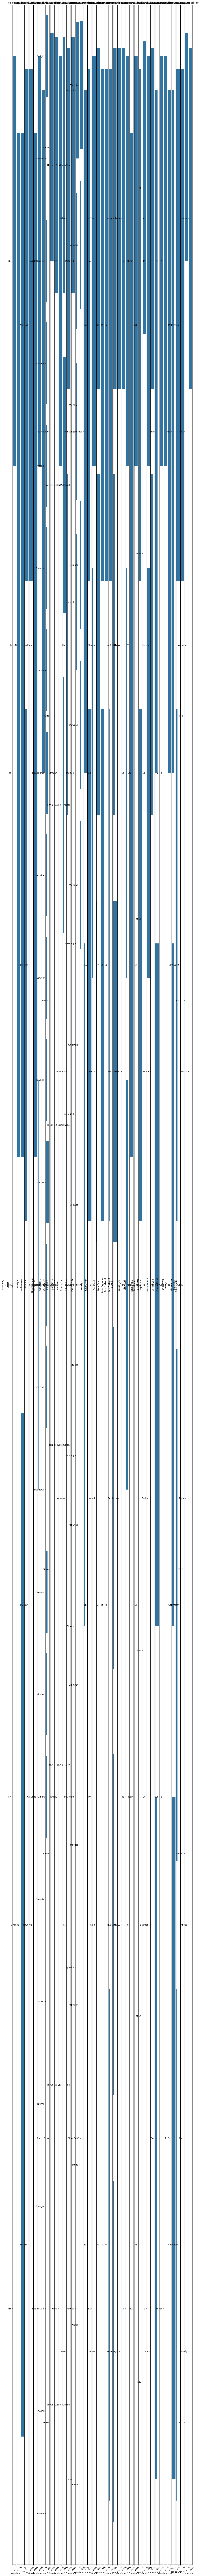

ValueError: Could not interpret value `target_variable` for `y`. An entry with this name does not appear in `data`.

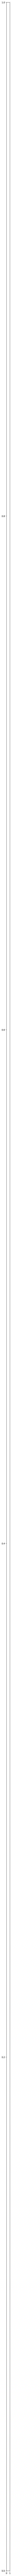

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
data = pd.read_csv(r"C:\Users\varun\Downloads\train.csv")

# Histograms and Distributions for numeric variables
numeric_vars = data.select_dtypes(include=['int', 'float']).columns
num_plots = len(numeric_vars)
num_rows = math.ceil(num_plots / 3)
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_vars):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Bar Plots for categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 5 * len(categorical_vars)))
for i, col in enumerate(categorical_vars):
    plt.subplot(1, len(categorical_vars), i + 1)
    sns.countplot(data[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plots or Violin Plots for numeric variables across different categories
plt.figure(figsize=(15, 5 * len(categorical_vars)))
for i, col in enumerate(categorical_vars):
    plt.subplot(1, len(categorical_vars), i + 1)
    sns.boxplot(x=col, y='target_variable', data=data)
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pairplot for pairwise relationships between numeric variables
sns.pairplot(data[numeric_vars])
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


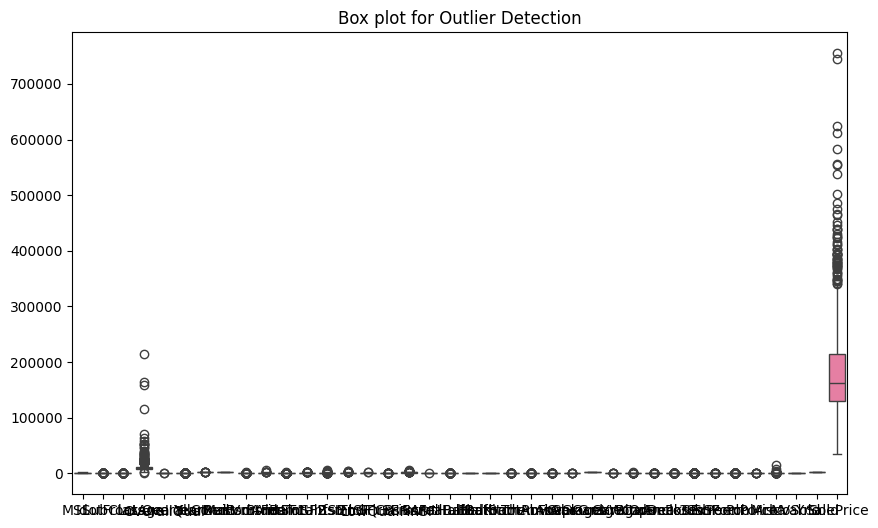

In [58]:
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_vars])
plt.title("Box plot for Outlier Detection")
plt.show()


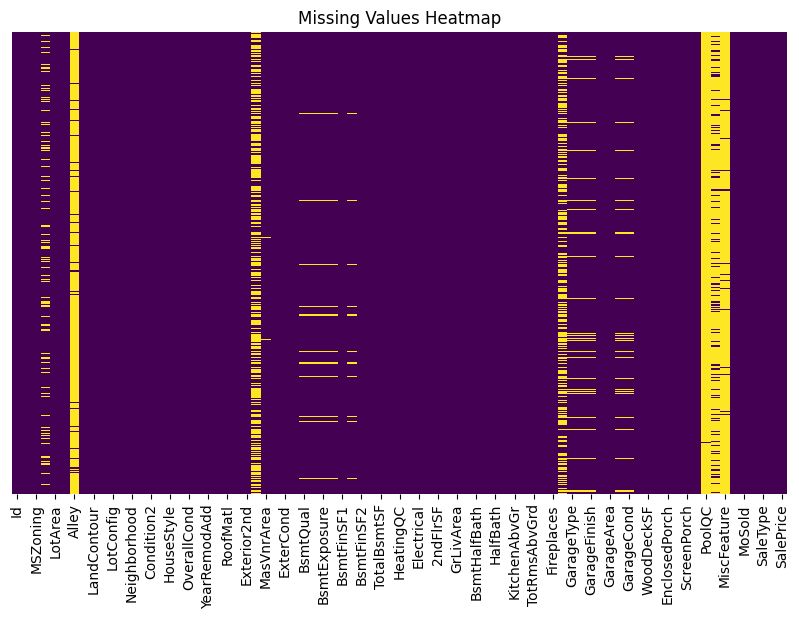

In [60]:
# Missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [65]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/9.9 MB 14.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/9.9 MB 13.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.9 MB 15.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.9 MB 16.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.9 MB 16.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.9 MB 16.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.1/9.9 MB 16.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.9 MB 16.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.7/9.9 MB 16.5 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 16.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.3/9.9 MB 16.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.1/9.9 MB 16.7 MB/s eta 0:00:01
   ----